# Taylor Series Approximation & Contour Plots

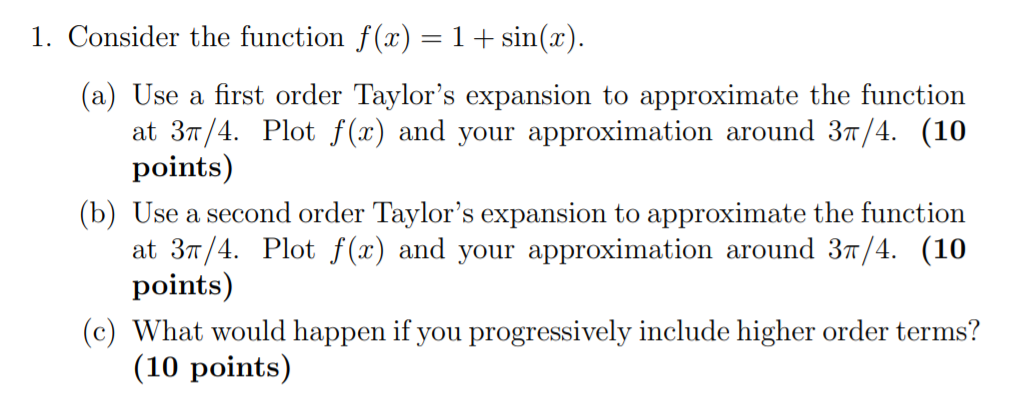 

In [1]:
# import necessary modules
import numpy as np
import functools
import matplotlib.pyplot as plt

### Derivative of Sin(x)
- nth derivative of sin(x) can be written as 
 $\frac{d^n Sin(x)}{dx^n} = Sin(x + \frac{n\pi}{2})$

In [2]:
def func_derivative(order, point):
    """
    This function returns the value of nth order derivative of sin(x) at a given point
    
    Args:
        order: scalar value stating order of the derivative
        point: point at which value of derivative to be calculated
        
    Returns:
        value of nth order derivative of sin(x) at the given point 
    """
    if order % 4 == 0:
        return np.sin(point)
    
    elif order % 4 == 1:
        return np.cos(point)
    
    elif order % 4 == 2:
        return -np.sin(point)
    
    else:
        return -np.cos(point)

In [3]:
# This function will return the factorial of n
def factorial(n):
    if n == 0:
        return 1
    else:
        return functools.reduce(lambda x, y: x * y, range(1, n + 1))

## Taylor Series
Taylor series for a function $f(x)$ about $x=a$ is :
$$\begin{align*}f\left( x \right) & = \sum\limits_{n = 0}^\infty {\frac{{{f^{\left( n \right)}}\left( a \right)}}{{n!}}{{\left( {x - a} \right)}^n}} \\ & = f\left( a \right) + f'\left( a \right)\left( {x - a} \right) + \frac{{f''\left( a \right)}}{{2!}}{\left( {x - a} \right)^2} + \frac{{f'''\left( a \right)}}{{3!}}{\left( {x - a} \right)^3} + \cdots \end{align*}$$


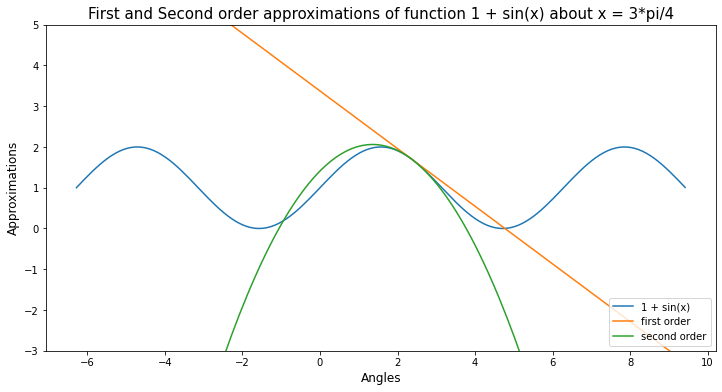

In [4]:
# angles for calculating values of sin(x)
angles = np.arange(-2* np.pi, 3 * np.pi, 0.1)    

# point about which function is approximated
point = 3 * np.pi / 4

# given function
f_x = 1 + np.sin(angles)

# figure object to display
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(angles, f_x)


# first order approximation of f_x
first_order = 1 + np.sin(point) + func_derivative(1, point) * (angles - point)
ax.plot(angles, first_order)


# second order approximation of f_x
second_order = first_order + 0.5 * func_derivative(2, point) * (angles - point) ** 2
ax.plot(angles, second_order)


# set labels for the plot
labels = ['1 + sin(x)', 'first order', 'second order']
ax.set_ylim([-3, 5])   # set y axis limits
ax.set_xlabel('Angles', fontsize = 12)
ax.set_ylabel('Approximations', fontsize = 12)
ax.set_title('First and Second order approximations of function 1 + sin(x) about x = 3*pi/4', fontsize = 15)
ax.legend(labels, loc = 4)
plt.show()

## Progressively including higher order terms in the Taylor Series approximation

In [5]:
def taylor_approx(order_list = [5, 10, 15, 20], function = f_x):
    """
    This function will plot the different order approximations given by the order_list parameter
    
    Args:
        order_list: list of orders to approximate and plot the function
        function: function to be approximated and plotted
    """
    
    # create figure object to display
    fig, ax = plt.subplots(figsize = (14, 8))
    ax.plot(angles, function)

    
    labels = ['1 + sin(x)']
    approximation = 1 + np.sin(point)
    
    for i in range(1, order_list[-1] + 1):
        approximation += func_derivative(i, point) * (angles - point) ** i / factorial(i)
        if i in order_list:
            ax.plot(angles, approximation)
            labels.append('{}_order'.format(i))
      
    
    # set the title and axes labels for the plot 
    ax.set_xlabel('Angles', fontsize = 15)
    ax.set_ylabel('Approximations', fontsize = 15)
    ax.set_title('Different order approximations of function 1 + sin(x) about x = 3*pi/4', fontsize = 18)
    
    # set y axis limits
    ax.set_ylim([-3, 5])
    ax.legend(labels, loc = 4)
    plt.show()

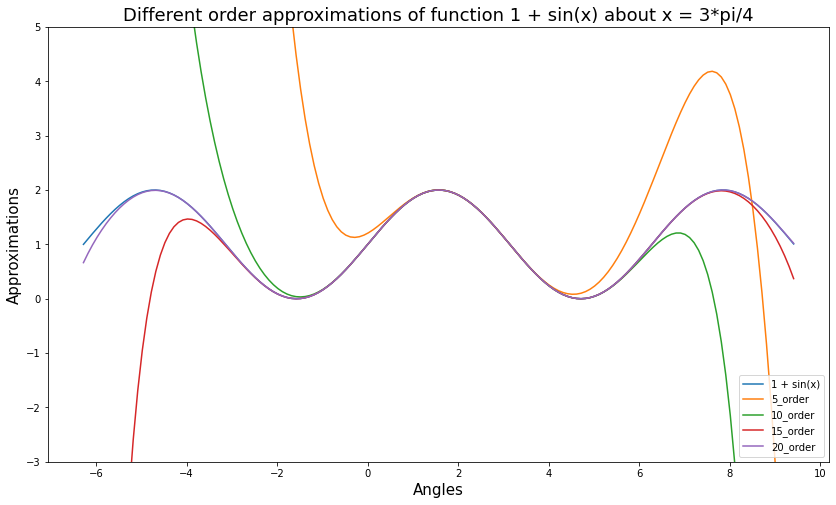

In [6]:
## Call the function taylor_approx with the order_list parameter for plotting different order approximations
order_list = [5, 10, 15, 20]
taylor_approx(order_list)

### Observations from the graph
- As we include higher order terms in the Taylor Series expansion of the given function, it approximates the given function more better about the given point.

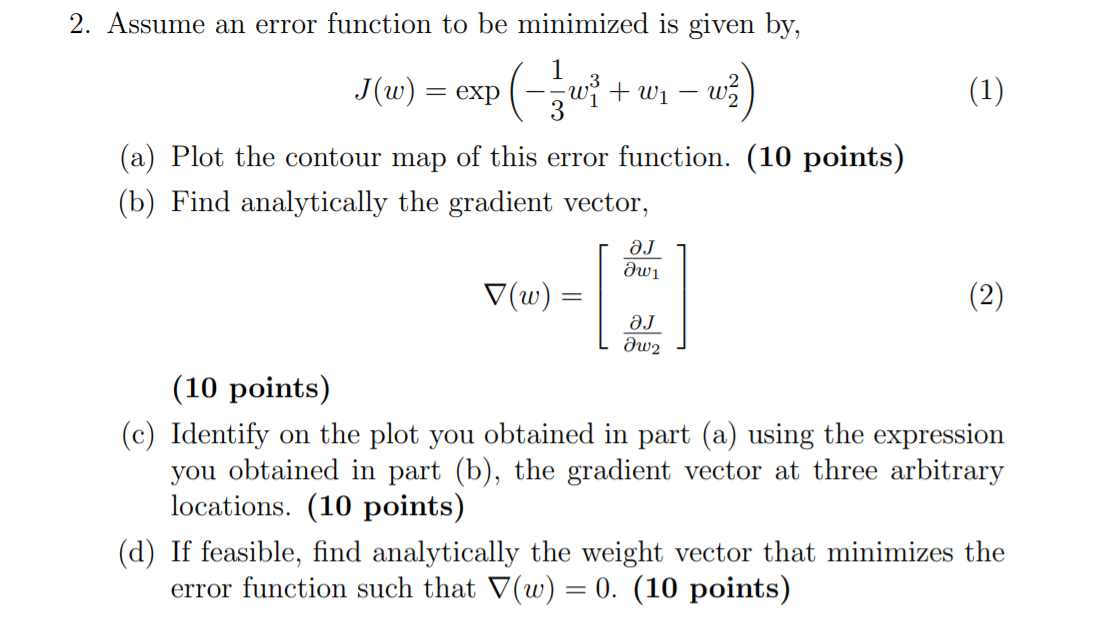

### Gradient of cost function w.r.t. parameters w1, w2
- $\frac{\partial{J}}{w_{1}}$ = $exp(-\frac{1}{3}w_{1}^{3} + w_{1} - w_{2}^{2}) * (1 - w_{1}^{2})$

- $\frac{\partial{J}}{w_{2}}$ = $exp(-\frac{1}{3}w_{1}^{3} + w_{1} - w_{2}^{2}) * (-2w_{2})$

In [7]:
def cal_grad(w1, w2):
    """
    This function will calculate the gradient of cost w.r.t. parameters w1, w2
    
    Args:
        w1: value of parameter w1
        w2: value of parameter w2
        
    Returns:
        grad_w1: gradient of cost w.r.t. parameter w1
        grad_w2: gradient of cost w.r.t. parameter w2
    """
    grad_w1 = np.exp((-1 / 3) * w1 ** 3 + w1 - w2 ** 2) * (1 - w1 ** 2)
    grad_w2 = np.exp((-1 / 3) * w1 ** 3 + w1 - w2 ** 2) * (-2 * w2)
    return grad_w1, grad_w2

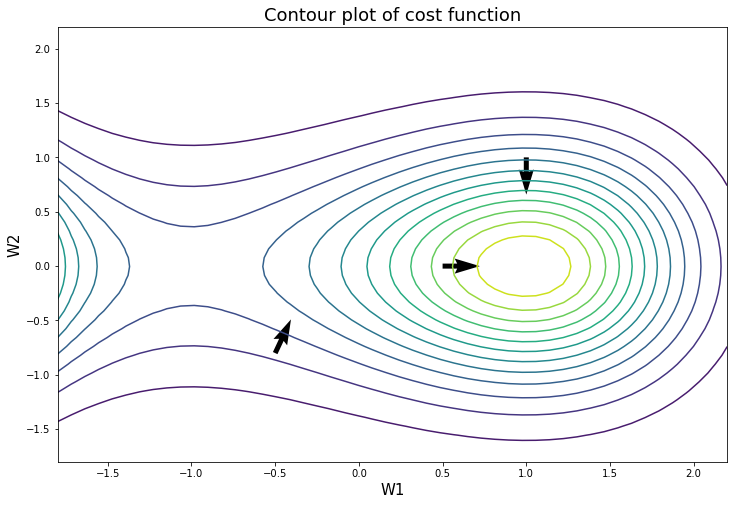

In [8]:
w1 = np.array([np.linspace(-1.8, 2.2, 50)])    # values of w1
w2 = np.array([np.linspace(-1.8, 2.2, 50)])    # values of w2

# coordinates for plotting
X, Y = np.meshgrid(w1, w2) 

# calculate cost at each point
cost_array = np.exp((-1 / 3) * X ** 3 + X - Y ** 2)

fig, ax = plt.subplots(figsize = (12, 8))

# contour plot of cost function
ax.contour(X, Y, cost_array, levels = 12)
ax.set_title('Contour plot of cost function', fontsize = 18)
ax.set_xlabel('W1', fontsize = 15)
ax.set_ylabel('W2', fontsize = 15)

# plot gradient direction at any 3 points
grad1, grad2 = cal_grad(0.5, 0)
ax.quiver(0.5, 0, grad1, grad2)

grad3, grad4 = cal_grad(1, 1)
ax.quiver(1, 1, grad3, grad4)

grad5, grad6 = cal_grad(-0.5, -0.8)
ax.quiver(-0.5, -0.8, grad5, grad6)
plt.show()

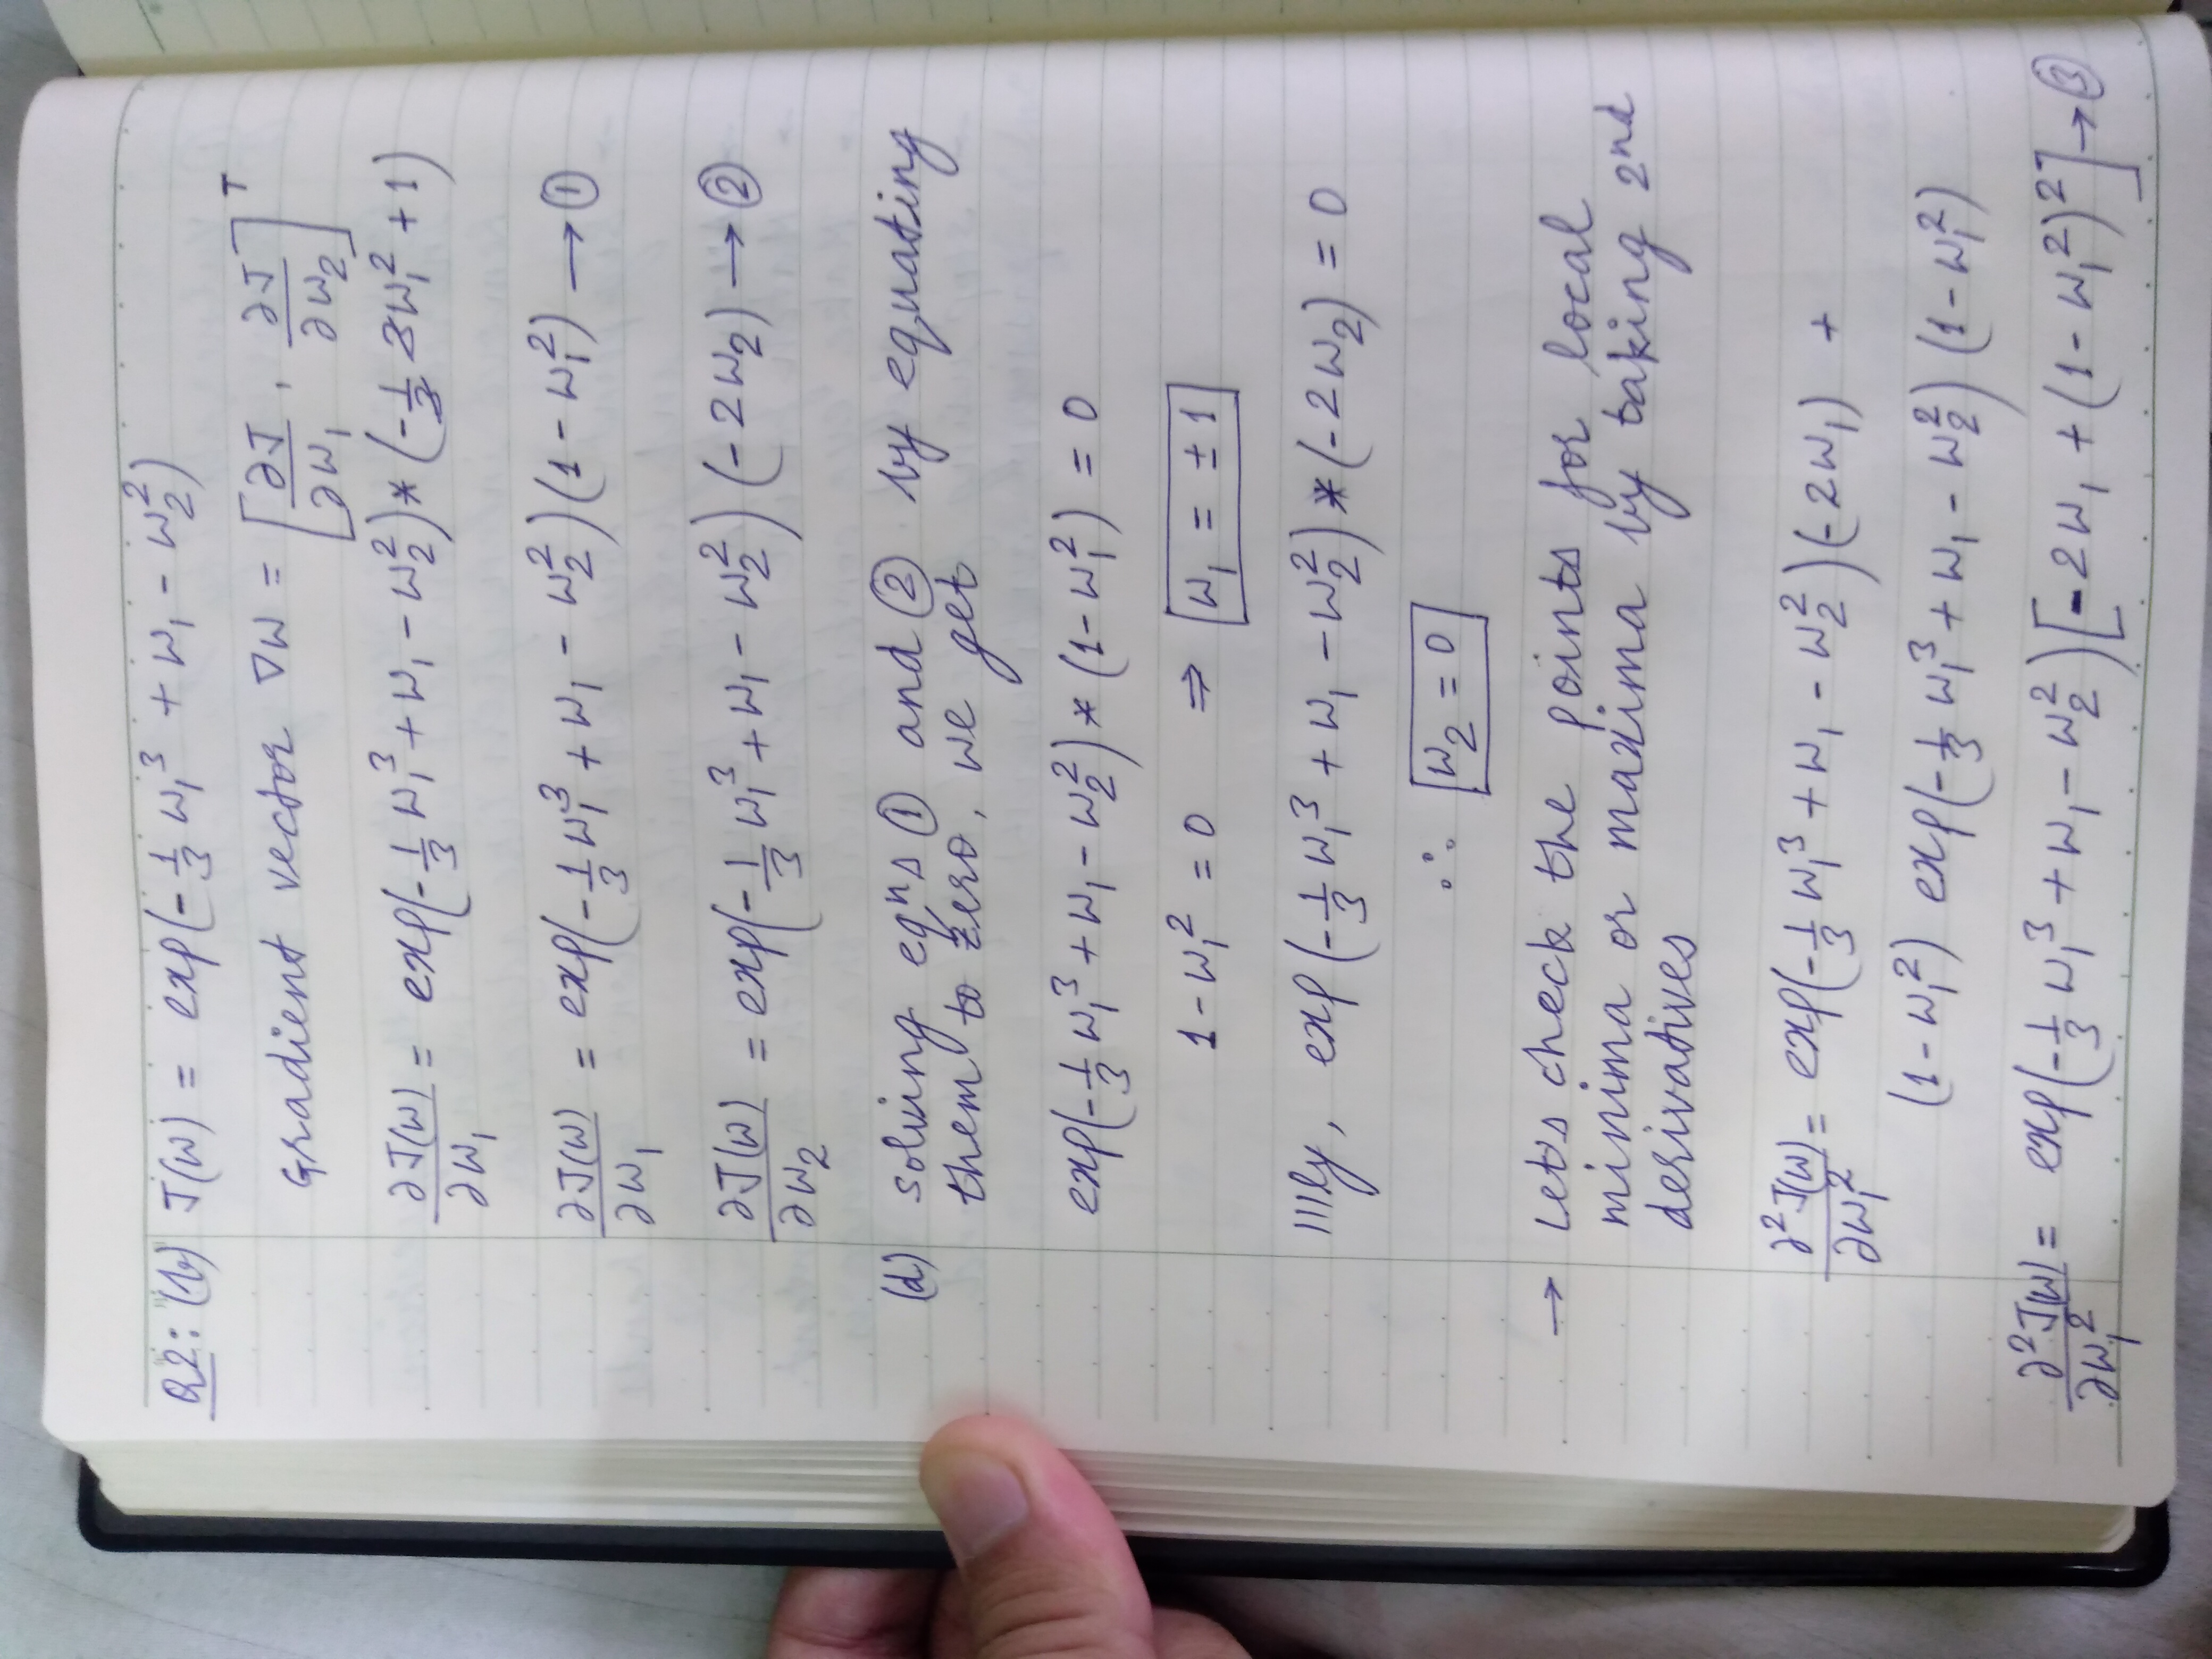

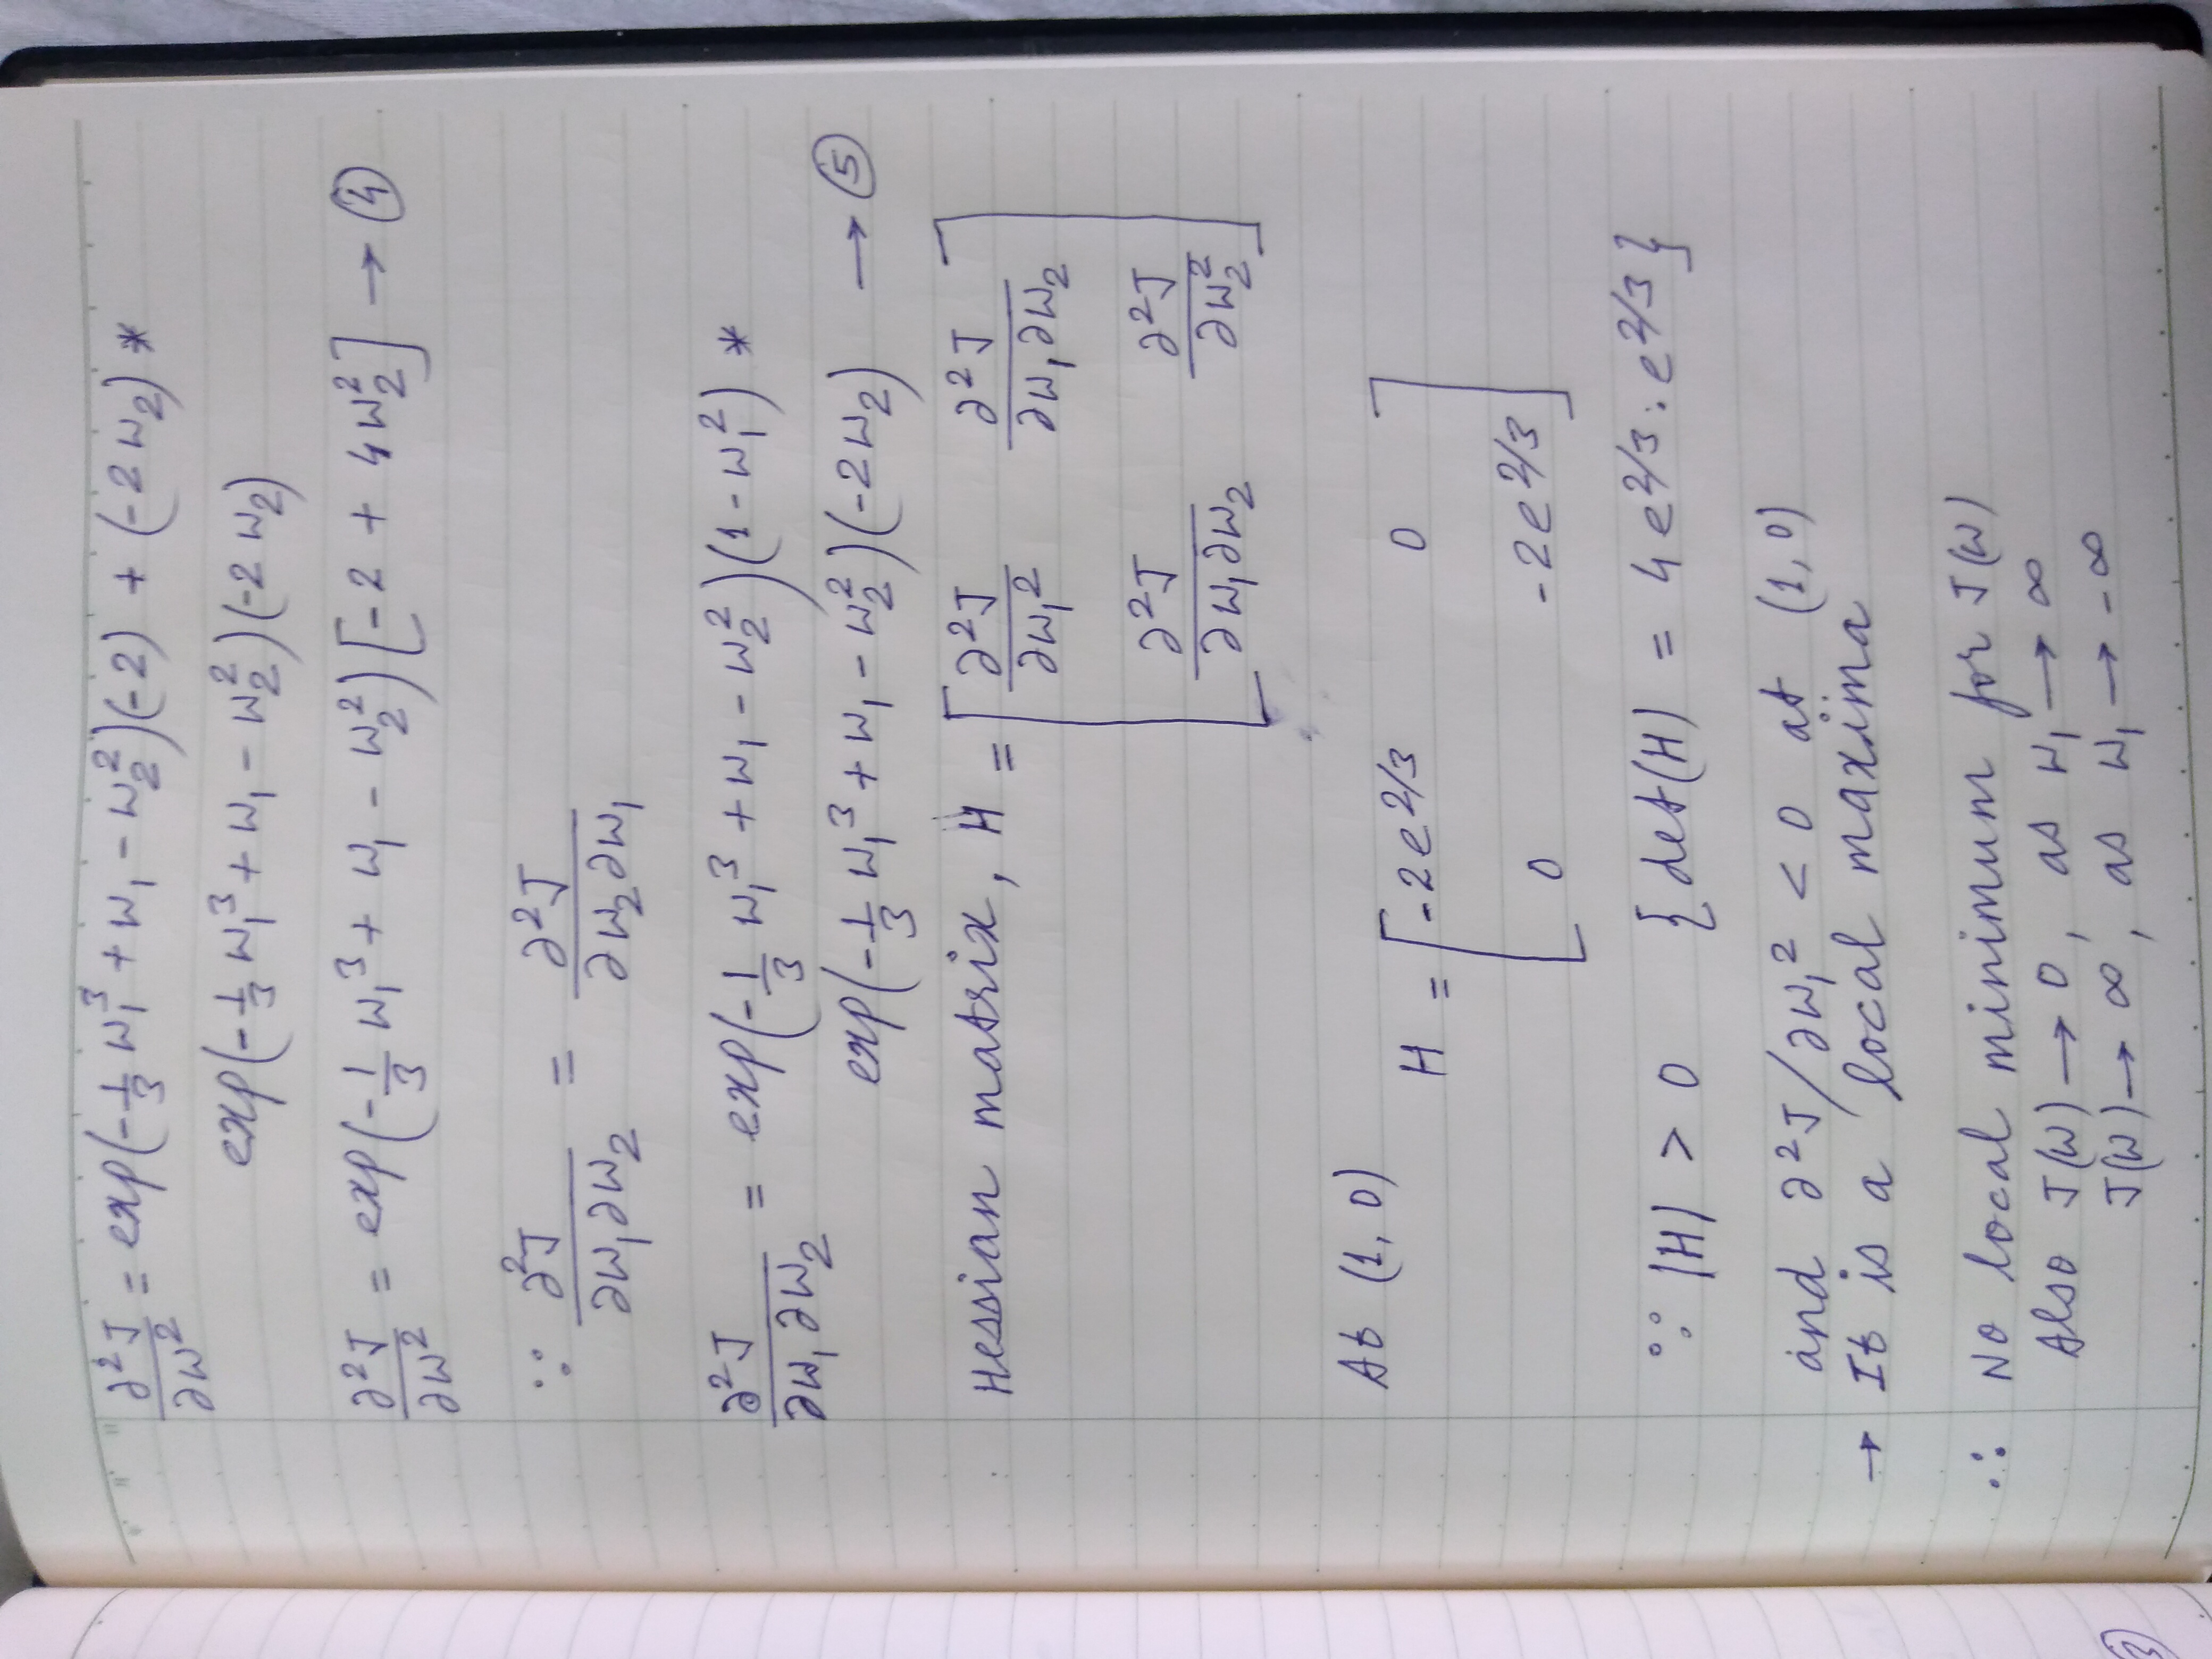